In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = ['DeJavu Serif']
plt.rcParams['font.serif'] = ['Times New Roman']

In [180]:
def process_csv_file(csv_file):
    # Load the CSV into a pandas DataFrame
    df = pd.read_csv(csv_file, header=None, names=['ID', 'RMSD', 'z_increment', 'pert_num'])

    # Calculate average RMSD
    avg_rmsd = df['RMSD'].mean()

    # Extract z_increment and pert_num
    z_increment = df['z_increment'].iloc[0]
    pert_num = df['pert_num'].iloc[0]

    return avg_rmsd, z_increment, pert_num

In [181]:
def process_directories(base_dir,target_csv):
    results = []
    for subdir, _, files in os.walk(base_dir):
        if target_csv in files:
            csv_file = os.path.join(subdir, target_csv)
            avg_rmsd, z_increment, pert_num = process_csv_file(csv_file)
            if avg_rmsd is not None:
                results.append([subdir, avg_rmsd, z_increment, pert_num])
    
    # Convert the results to a pandas DataFrame
    return pd.DataFrame(results, columns=['Directory', 'Average_RMSD', 'z_increment', 'pert_num'])

## Analyze Results.1

In [5]:
os.chdir("/home/cadeniran/u1/amphiscan-pep-spin")
base_dir = "results_grid.1/"  # Specify the base directory
output_file = "rmsd_results.csv"  # Output CSV file
target_csv = "rmsd_values.csv" #csv to look for in each subdir

In [6]:
data = []
data = process_directories(base_dir,target_csv)

In [7]:
datamap = data.pivot(index="pert_num", columns="z_increment", values="Average_RMSD")

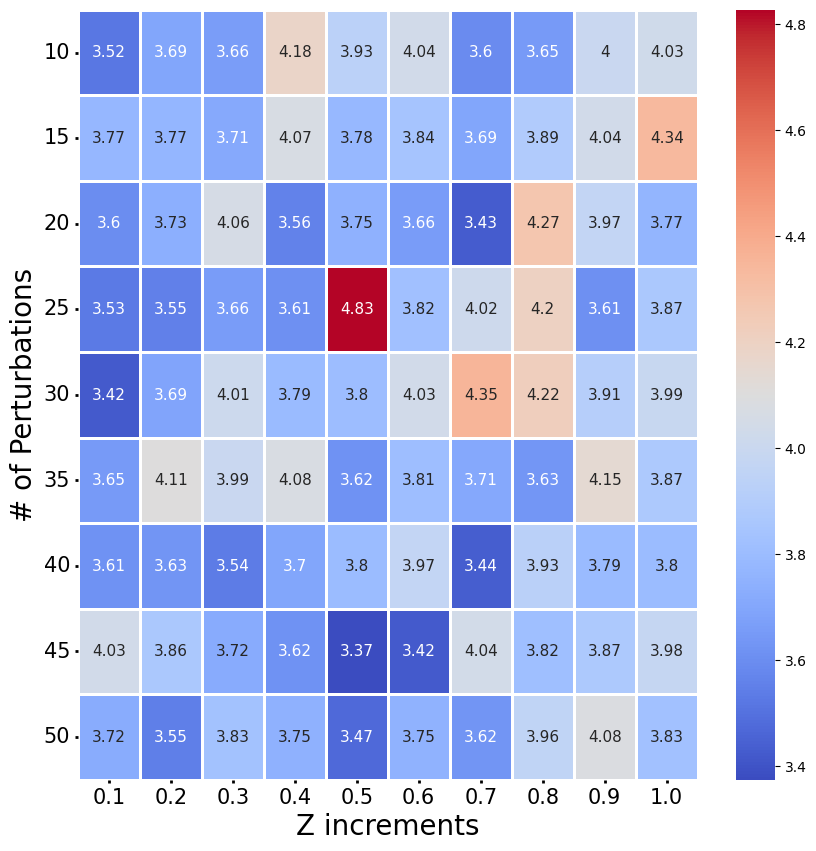

In [8]:
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11},fmt='.3g')

plt.xlabel("Z increments", fontsize = 20)
plt.ylabel("# of Perturbations", fontsize = 20)
plt.yticks(rotation=0)
plt.tick_params(axis='both', labelsize='15', length=2, width=2)
#plt.savefig("/home/cadeniran/ipn/figs/heatmappepnew1.png", format='png', transparent=True, bbox_inches='tight')

## Analyze Results.2

In [9]:
os.chdir("/home/cadeniran/u1/amphiscan-pep-spin")
base_dir = "results_grid.2/"  # Specify the base directory
output_file = "rmsd_results.csv"  # Output CSV file
target_csv = "rmsd_values.csv" #csv to look for in each subdir

In [10]:
data = []
data = process_directories(base_dir,target_csv)

In [11]:
datamap = data.pivot(index="pert_num", columns="z_increment", values="Average_RMSD")

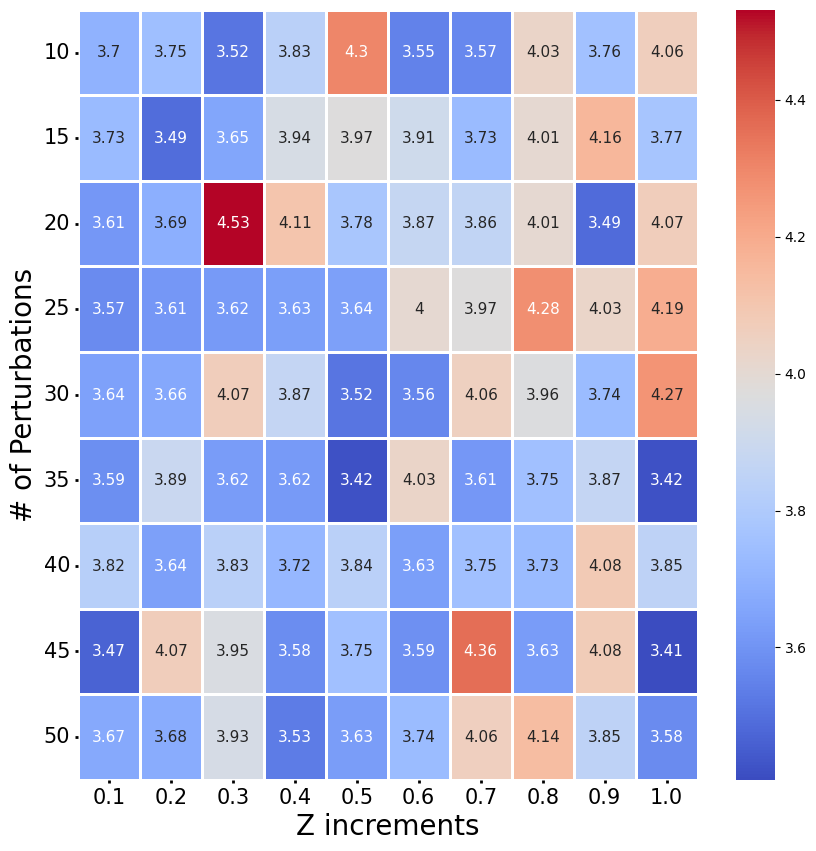

In [12]:
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11},fmt='.3g')

plt.xlabel("Z increments", fontsize = 20)
plt.ylabel("# of Perturbations", fontsize = 20)
plt.yticks(rotation=0)
plt.tick_params(axis='both', labelsize='15', length=2, width=2)
#plt.savefig("/home/cadeniran/ipn/figs/heatmappepnew2.png", format='png', transparent=True, bbox_inches='tight')

## Analyze Results.3

In [150]:
os.chdir("/home/cadeniran/u1/amphiscan-pep-spin")
base_dir = "results_grid.3/"  # Specify the base directory
output_file = "rmsd_results.csv"  # Output CSV file
target_csv = "rmsd_values.csv" #csv to look for in each subdir

In [151]:
data = []
data = process_directories(base_dir,target_csv)

In [152]:
datamap = data.pivot(index="pert_num", columns="z_increment", values="Average_RMSD")

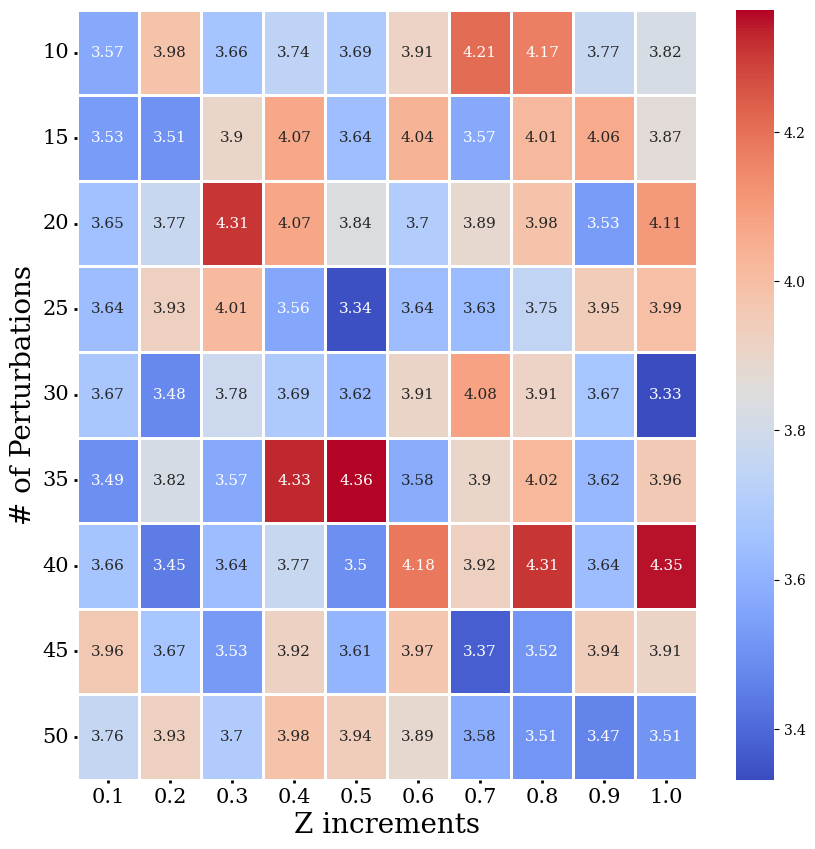

In [156]:
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11},fmt='.3g')

plt.xlabel("Z increments", fontsize = 20)
plt.ylabel("# of Perturbations", fontsize = 20)
plt.yticks(rotation=0)
plt.tick_params(axis='both', labelsize='15', length=2, width=2)
#plt.savefig("/home/cadeniran/ipn/figs/heatmappepnew3.png", format='png', transparent=True, bbox_inches='tight')

# Extended

In [195]:
os.chdir("/home/cadeniran/u1/amphiscan-pep-spin")
base_dir = "long/"  # Specify the base directory
output_file = "rmsd_results.csv"  # Output CSV file
target_csv = "rmsd_values.csv" #csv to look for in each subdir

In [196]:
data = []
data = process_directories(base_dir,target_csv)

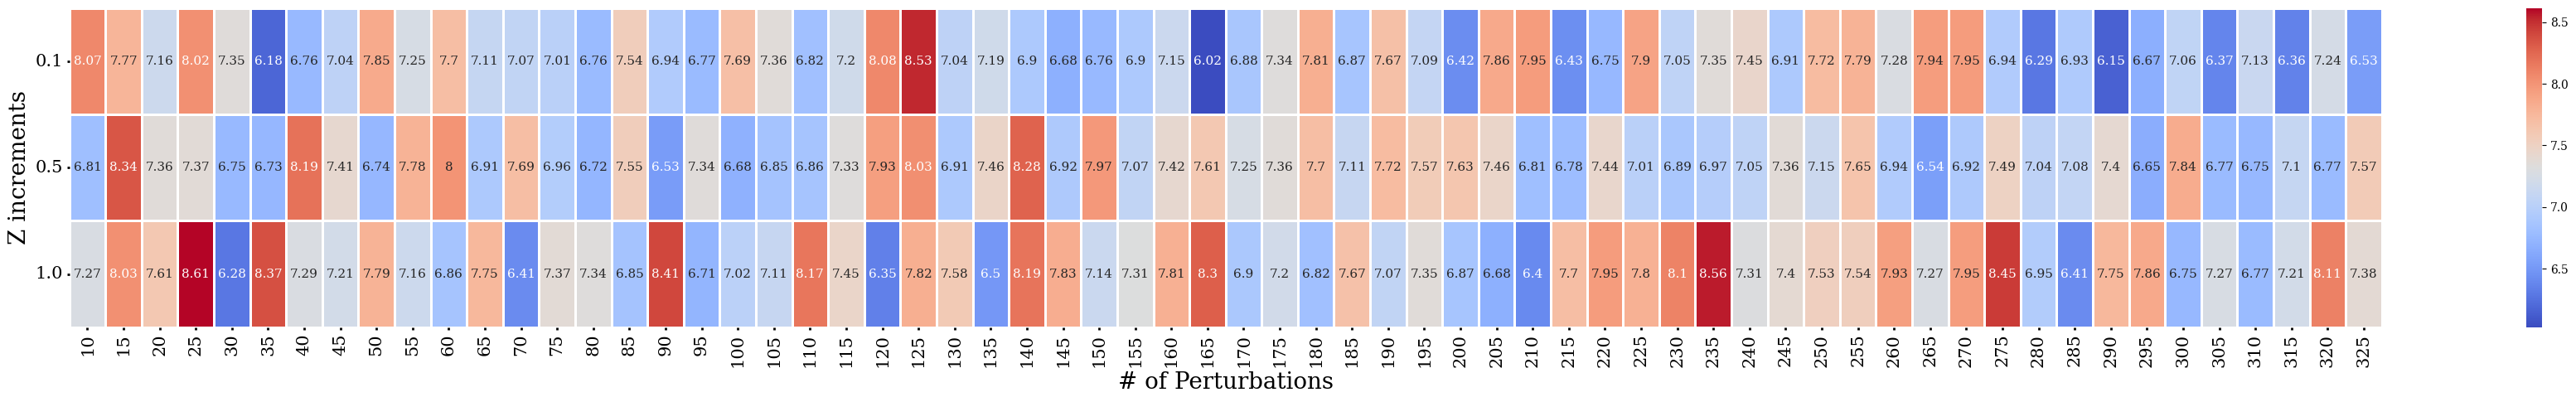

In [197]:
plt.rcParams['figure.figsize'] = 45,5

datamap = pd.pivot_table(data, index= "z_increment", columns="pert_num", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g')

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)

plt.savefig("/home/cadeniran/ipn/figs/long1heatmap.png", format='png', transparent=True, bbox_inches='tight')

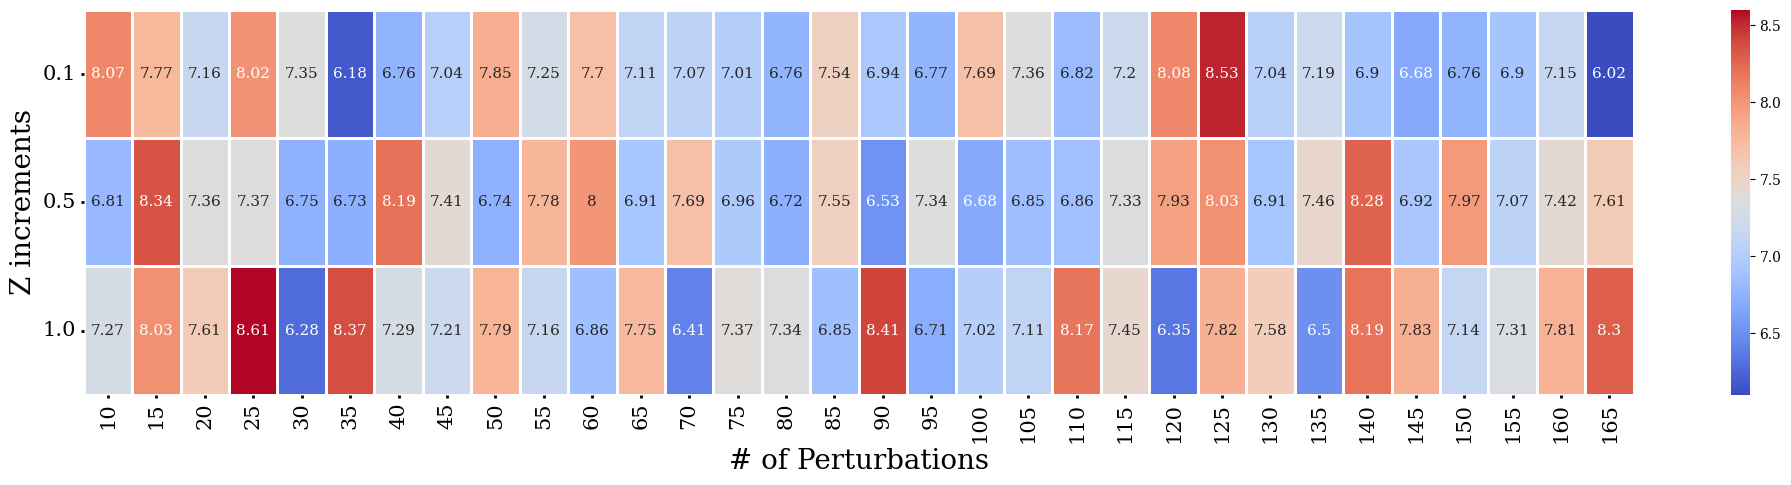

In [170]:
plt.rcParams['figure.figsize'] = 25,5

datamap = pd.pivot_table(data[data['pert_num'] <= 165], index= "z_increment", columns="pert_num", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g', vmin=6.1, vmax=8.6)

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)
#plt.savefig("/home/cadeniran/ipn/figs/longheatmap1.png", format='png', transparent=True, bbox_inches='tight')

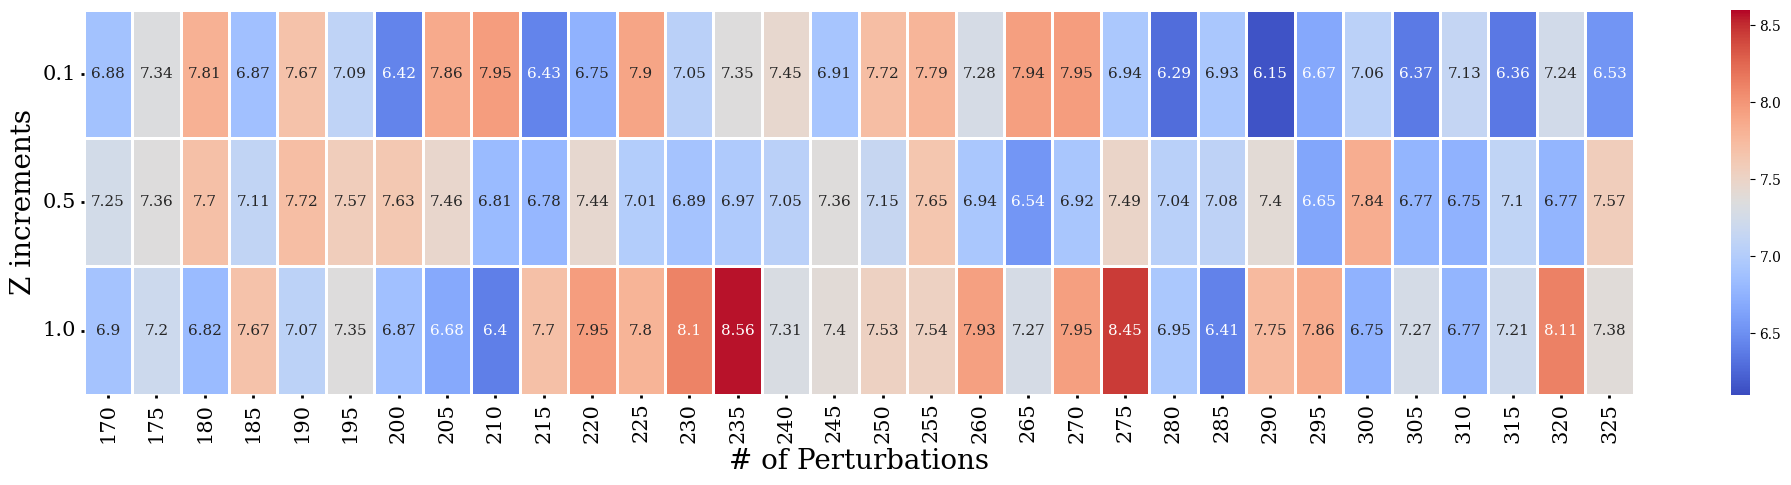

In [171]:
plt.rcParams['figure.figsize'] = 25,5

datamap = pd.pivot_table(data[data['pert_num'] >= 170], index= "z_increment", columns="pert_num", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g', vmin=6.1, vmax=8.6)

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)
#plt.savefig("/home/cadeniran/ipn/figs/longheatmap2.png", format='png', transparent=True, bbox_inches='tight')

# Extended 2

In [198]:
os.chdir("/home/cadeniran/u1/amphiscan-pep-spin")
base_dir = "long2/"  # Specify the base directory
output_file = "rmsd_results.csv"  # Output CSV file
target_csv = "rmsd_values.csv" #csv to look for in each subdir

In [199]:
data = []
data = process_directories(base_dir,target_csv)

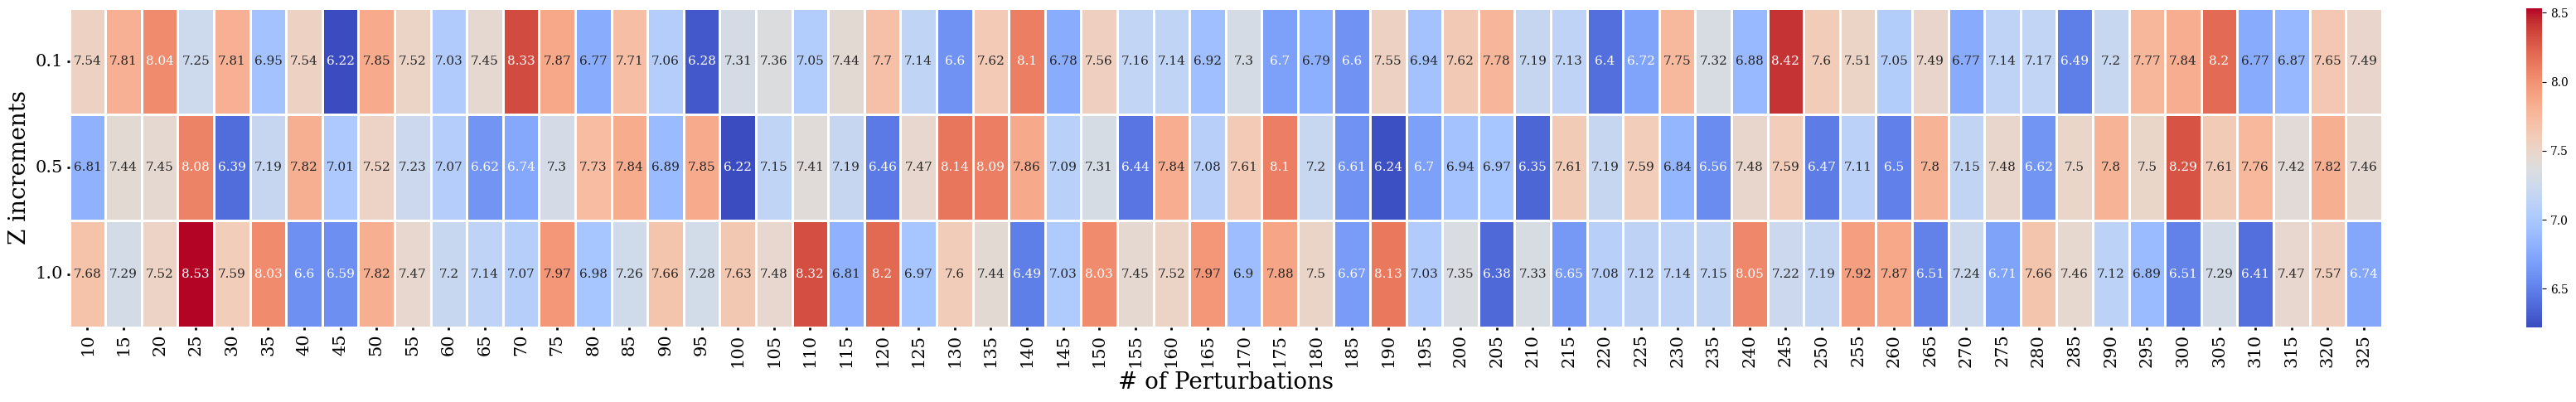

In [200]:
plt.rcParams['figure.figsize'] = 45,5

datamap = pd.pivot_table(data, index= "z_increment", columns="pert_num", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g')

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)

plt.savefig("/home/cadeniran/ipn/figs/long2heatmap.png", format='png', transparent=True, bbox_inches='tight')

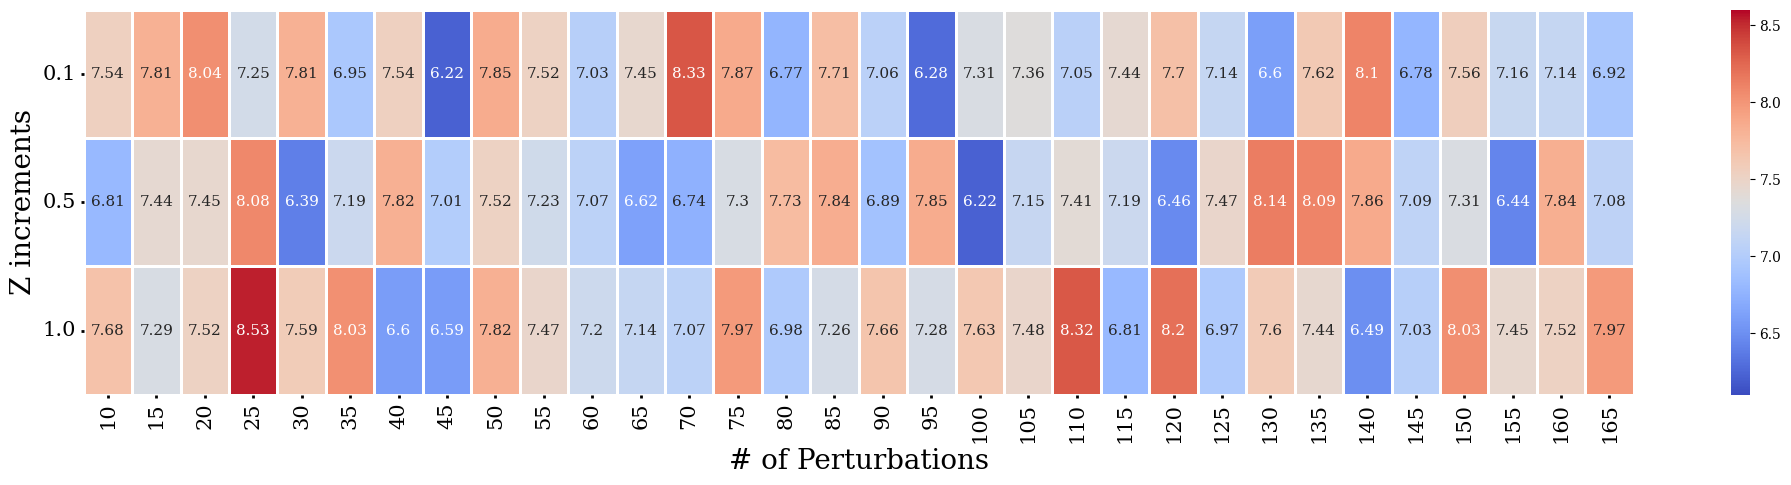

In [187]:
plt.rcParams['figure.figsize'] = 25,5

datamap = pd.pivot_table(data[data['pert_num'] <= 165], index= "z_increment", columns="pert_num", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g', vmin=6.1, vmax=8.6)

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)

#plt.savefig("/home/cadeniran/ipn/figs/longheatmap2.png", format='png', transparent=True, bbox_inches='tight')

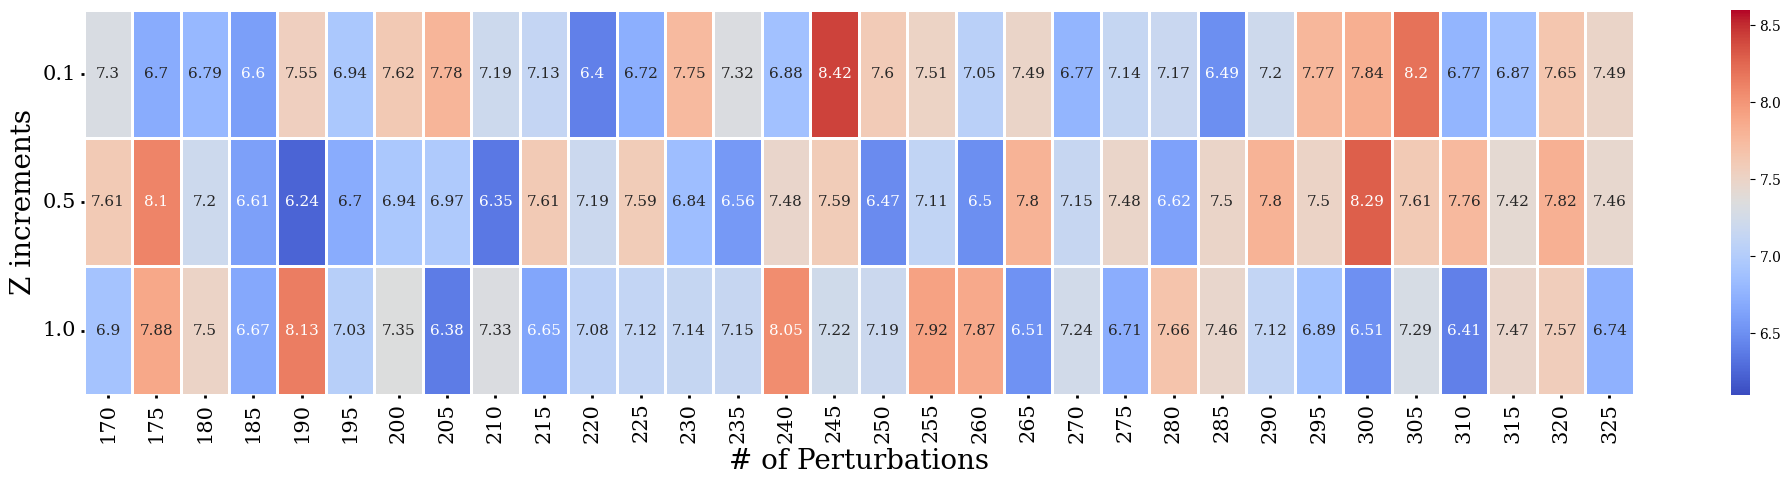

In [188]:
plt.rcParams['figure.figsize'] = 25,5

datamap = pd.pivot_table(data[data['pert_num'] >= 170], index= "z_increment", columns="pert_num", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g', vmin=6.1, vmax=8.6)

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)

#plt.savefig("/home/cadeniran/ipn/figs/longheatmap2.png", format='png', transparent=True, bbox_inches='tight')

# Extended 3

In [201]:
os.chdir("/home/cadeniran/u1/amphiscan-pep-spin")
base_dir = "long3/"  # Specify the base directory
output_file = "rmsd_results.csv"  # Output CSV file
target_csv = "rmsd_values.csv" #csv to look for in each subdir

In [202]:
data = []
data = process_directories(base_dir,target_csv)

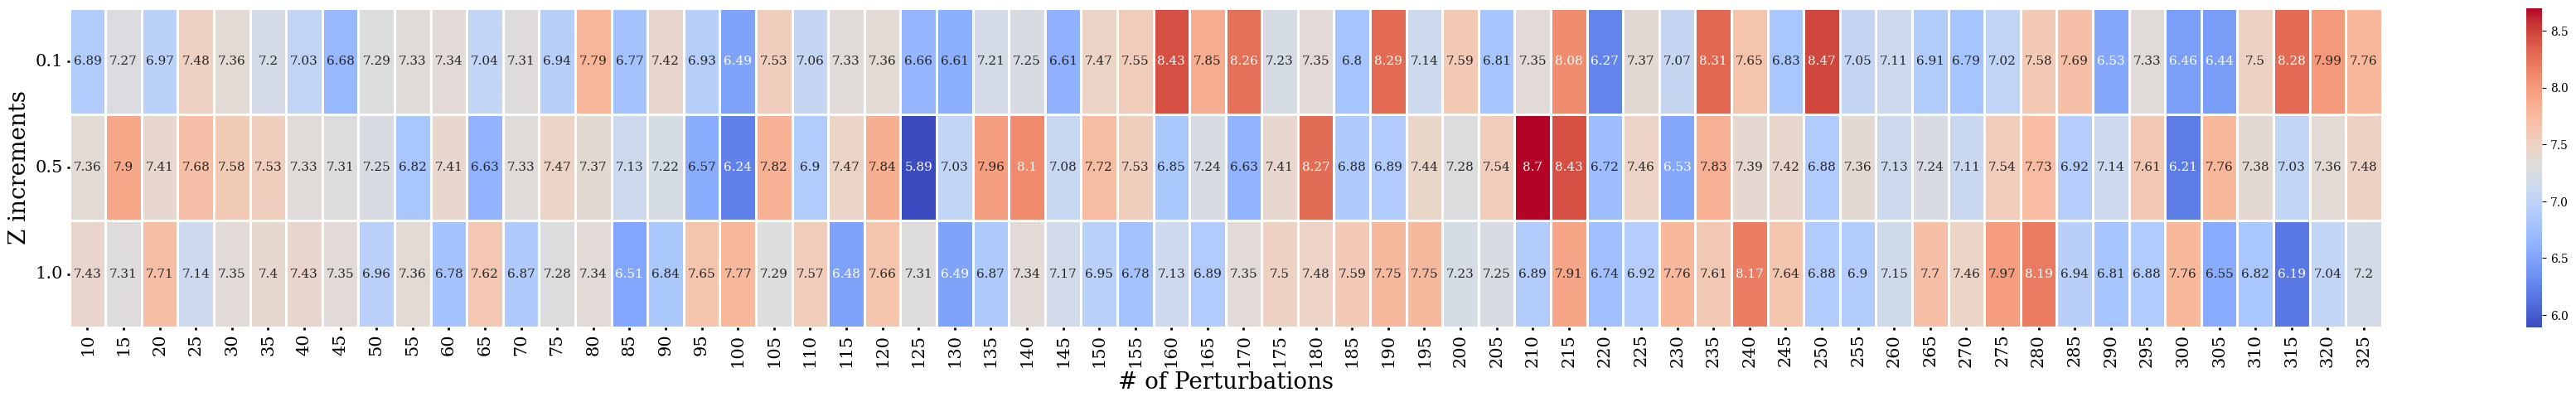

In [203]:
plt.rcParams['figure.figsize'] = 45,5

datamap = pd.pivot_table(data, index= "z_increment", columns="pert_num", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g')

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)

plt.savefig("/home/cadeniran/ipn/figs/long3heatmap.png", format='png', transparent=True, bbox_inches='tight')

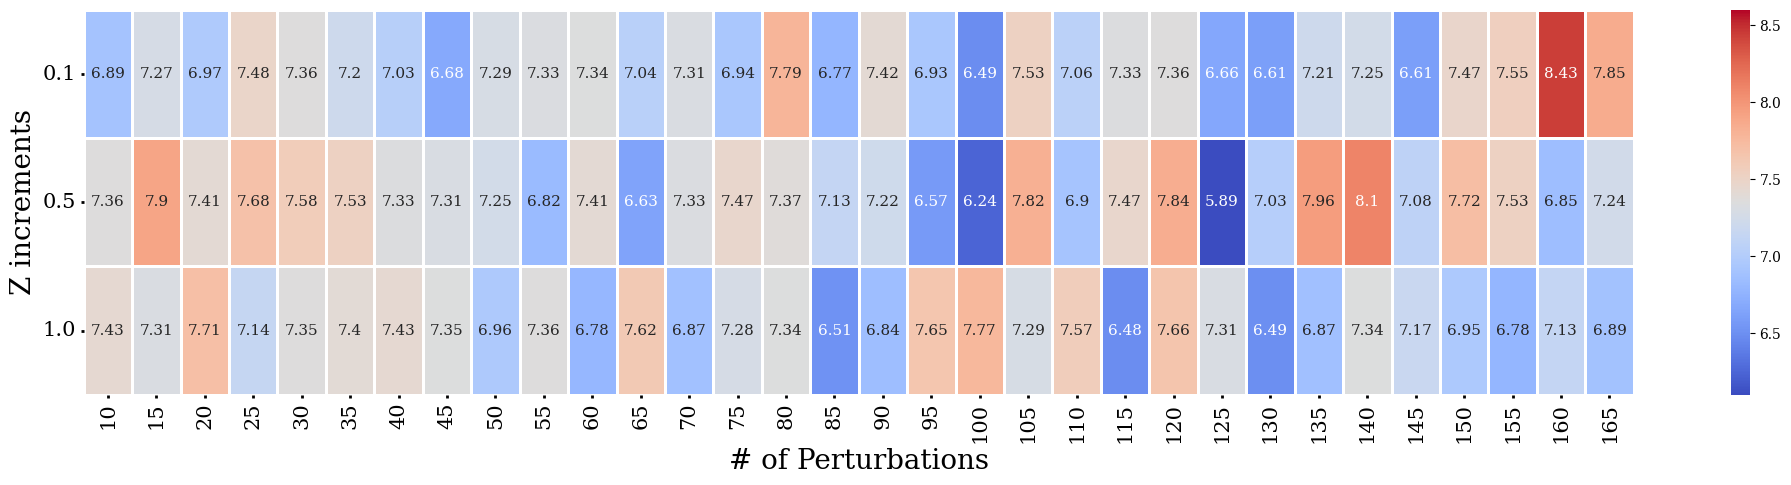

In [192]:
plt.rcParams['figure.figsize'] = 25,5

datamap = pd.pivot_table(data[data['pert_num'] <= 165], index= "z_increment", columns="pert_num", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g', vmin=6.1, vmax=8.6)

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)
#plt.savefig("/home/cadeniran/ipn/figs/longheatmap1.png", format='png', transparent=True, bbox_inches='tight')

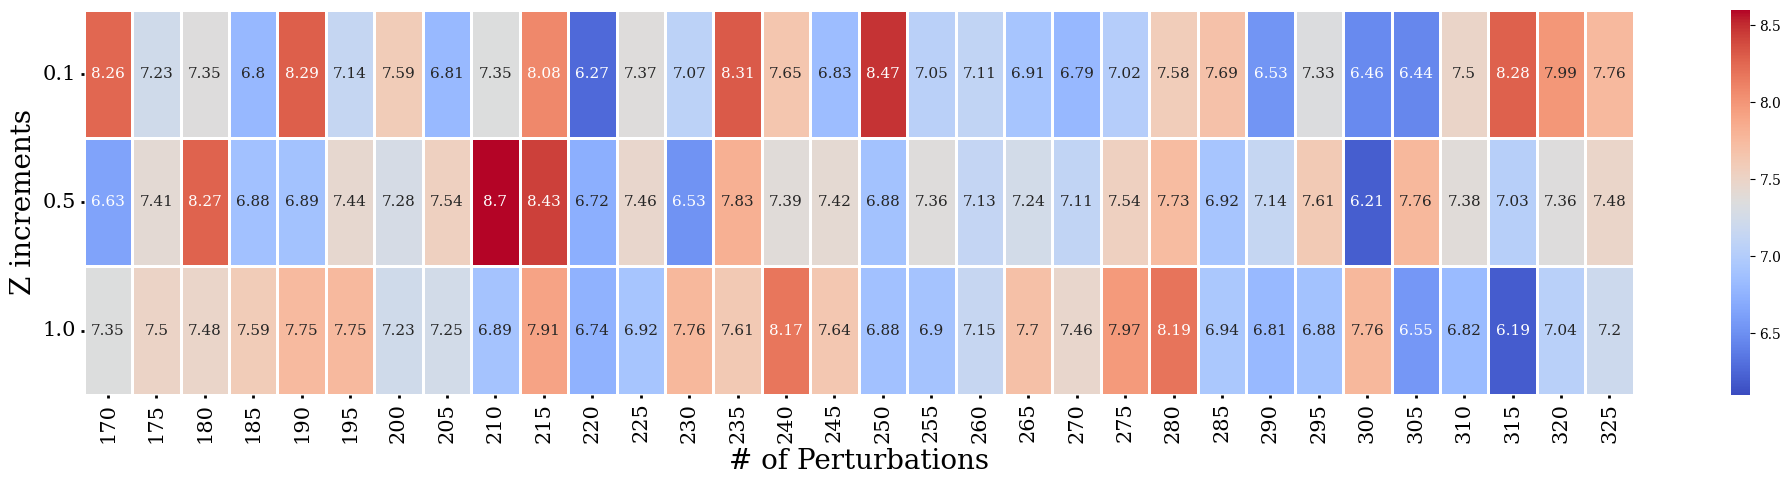

In [193]:
plt.rcParams['figure.figsize'] = 25,5

datamap = pd.pivot_table(data[data['pert_num'] >= 170], index= "z_increment", columns="pert_num", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g', vmin=6.1, vmax=8.6)

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)
#plt.savefig("/home/cadeniran/ipn/figs/longheatmap2.png", format='png', transparent=True, bbox_inches='tight')